# HSE 2024: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [ ]:
def find_product(a,r,N):
    arr_product = [a]
    for i in range(N - 1):
      arr_product.append(arr_product[-1] * r)
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back.

In [ ]:
def check_palindrome(N):
    s1 = str(N)
    s2 = s1[::-1]
    return s1 ==s2

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    a = 1000
    palindromes = []
    while len(palindromes) < N:
      if check_palindrome(a):
        palindromes.append(a)
      a += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [ ]:
from random import randint
def find_min(a, b, c):
    min_ = a
    if (min_ > b):
      min_ = b
    if (min_ > c):
      min_ = c
    return min_

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMinimum:', find_min(a, b, c))

71 -75 -99 	Minimum: -99
18 70 42 	Minimum: 18
15 20 -85 	Minimum: -85
-82 -61 -8 	Minimum: -82
18 -6 -2 	Minimum: -6
84 -38 -86 	Minimum: -86
-20 -85 13 	Minimum: -85
89 36 -7 	Minimum: -7
54 -50 48 	Minimum: -50
25 -16 75 	Minimum: -16


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [ ]:
my_array = np.random.rand(17)
my_array = my_array / np.sum(my_array) * 6
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.000000000000001


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum((a - b) ** 2))
    return distance

def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):
    distance = 1 - (a.T).dot(b) / (calculate_euclidean(a, 0) * calculate_euclidean(b, 0))
    return distance

In [ ]:
len = np.random.randint(1, 100)
a = np.random.randint(1, 10, len)
b = np.random.randint(1, 10, len)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 252
Euclidean distance: 33.34666400106613
Chebyshev distance: 8
Cosine distance: 0.22420553260701492


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [ ]:
def transform(array):
    transformed_array = array
    min = np.min(transformed_array)
    transformed_array = transformed_array + (-min)
    max = np.max(transformed_array)
    transformed_array = transformed_array / max * 3
    transformed_array = transformed_array - 4
    return transformed_array

In [ ]:
my_array = np.random.randint(-100, 100, 76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-2.75757576 -2.90909091 -2.04545455 -1.         -3.98484848 -1.3030303
 -2.86363636 -1.07575758 -2.83333333 -3.5        -3.93939394 -2.16666667
 -1.74242424 -2.53030303 -2.33333333 -1.40909091 -3.68181818 -3.53030303
 -1.62121212 -1.09090909 -1.39393939 -2.71212121 -3.74242424 -1.34848485
 -3.48484848 -3.21212121 -1.40909091 -1.37878788 -1.66666667 -2.1969697
 -3.         -2.24242424 -1.06060606 -2.1969697  -3.62121212 -2.54545455
 -3.54545455 -1.81818182 -1.         -2.90909091 -3.98484848 -2.77272727
 -1.16666667 -1.72727273 -3.65151515 -2.24242424 -1.12121212 -2.36363636
 -3.60606061 -1.74242424 -2.6969697  -1.18181818 -1.63636364 -2.59090909
 -3.53030303 -2.33333333 -3.87878788 -1.92424242 -3.92424242 -1.
 -3.71212121 -3.40909091 -2.81818182 -2.51515152 -4.         -2.74242424
 -2.65151515 -3.28787879 -1.12121212 -3.75757576 -3.6969697  -3.98484848
 -2.03030303 -2.81818182 -2.34848485 -3.95454545]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [ ]:
my_array = ## Your code here
selected_column = ## Your code here
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.38416403        nan 0.78585972 0.23763117 0.62210816 0.24226571
 0.16294417        nan        nan 0.20622584]


In [ ]:
def replace_missing(arr):
    array_without_missing = arr.copy()
    mean = np.nanmean(array_without_missing)
    array_without_missing[np.isnan(array_without_missing)] = mean
    return array_without_missing

In [ ]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.38416403 0.37731412 0.78585972 0.23763117 0.62210816 0.24226571
 0.16294417 0.37731412 0.37731412 0.20622584]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [ ]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0, 1))
    return mean_vector

In [ ]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.77803204 -2.08009153 -2.34782609]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [ ]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [ ]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[5 4 4]
  [5 5 5]
  [5 4 4]]

 [[5 5 4]
  [4 4 4]
  [4 4 5]]

 [[5 5 4]
  [4 5 4]
  [4 4 5]]

 [[4 4 5]
  [5 5 5]
  [5 5 4]]

 [[5 5 4]
  [5 4 5]
  [4 4 5]]

 [[5 4 5]
  [5 5 4]
  [4 4 4]]

 [[4 4 4]
  [4 4 4]
  [5 5 4]]

 [[5 4 4]
  [4 5 4]
  [5 5 5]]

 [[4 4 5]
  [4 4 4]
  [4 4 5]]

 [[4 5 4]
  [5 5 4]
  [5 5 5]]

 [[4 5 4]
  [5 4 5]
  [5 5 4]]

 [[4 4 4]
  [5 5 4]
  [4 5 5]]

 [[5 4 5]
  [5 4 4]
  [4 4 4]]

 [[4 4 5]
  [4 5 5]
  [5 5 5]]

 [[4 4 4]
  [5 5 5]
  [5 4 4]]

 [[5 5 5]
  [5 4 4]
  [5 5 4]]

 [[4 5 4]
  [4 4 5]
  [5 5 4]]

 [[5 5 5]
  [4 4 4]
  [5 4 5]]

 [[4 5 4]
  [5 4 4]
  [5 5 4]]]
Unique columns:


array([[[5, 4, 4],
        [5, 4, 4],
        [5, 5, 5]],

       [[4, 4, 5],
        [5, 5, 4],
        [4, 4, 4]],

       [[4, 4, 5],
        [5, 5, 4],
        [4, 5, 4]],

       [[5, 5, 4],
        [4, 4, 5],
        [5, 5, 5]],

       [[4, 4, 5],
        [5, 5, 4],
        [5, 4, 5]],

       [[4, 4, 4],
        [5, 4, 5],
        [5, 5, 4]],

       [[5, 5, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 4, 4],
        [4, 5, 4]],

       [[4, 4, 5],
        [4, 4, 5],
        [4, 4, 4]],

       [[5, 5, 5],
        [4, 5, 4],
        [5, 5, 4]],

       [[5, 5, 4],
        [4, 5, 4],
        [5, 4, 5]],

       [[4, 5, 5],
        [4, 4, 4],
        [5, 5, 4]],

       [[4, 4, 4],
        [5, 4, 5],
        [5, 4, 4]],

       [[5, 5, 5],
        [4, 4, 5],
        [4, 5, 5]],

       [[5, 4, 4],
        [4, 4, 4],
        [5, 5, 5]],

       [[5, 5, 4],
        [5, 5, 5],
        [5, 4, 4]],

       [[5, 5, 4],
        [4, 5, 4],
        [4, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [ ]:
data = pd.read_csv("titanic.csv", index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [ ]:
# * Are there any missing values? In what columns?
data.isna().sum()

# Asnwer: yes, columns Age, Cabin, Embarked

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
# * What is the percentage of survived passengers? Are the classes balanced?
print(data['Survived'].sum() / data.shape[0])

data.groupby(['Pclass']).Survived.sum() / data.Survived.sum()

# Asnwer: 38%
# The percentages are a bit different, but not too much

0.3838383838383838


,Survived
Pclass,
1,0.397661
2,0.254386
3,0.347953


In [ ]:
# * Were there more males or females?
males = data.Sex[data.Sex == 'male'].shape[0]
females = data.shape[0] - males
print('males: ', males)
print('females: ', females)

# Asnwer: More males

males:  577
females:  314


In [ ]:
# * What what the least popular port of embarkation?
data.Embarked.value_counts(sort=True, ascending=True).index[0]

# Asnwer: Q = Queenstown

'Q'

In [ ]:
# * How many classes (pclass) were there on Tinanic?
data.Pclass.unique().shape[0]

# Asnwer: 3

3

In [ ]:
# * What is the overall average ticket fare? And for every class?

print(f"overall: {data.Fare.sum() / data.shape[0]:.1f}")

data.groupby(['Pclass']).Fare.mean()

# Asnwer: $32
# Class 1 - $84
# Class 2 - $20
# Class 3 - $13

overall:  32.204207968574636


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

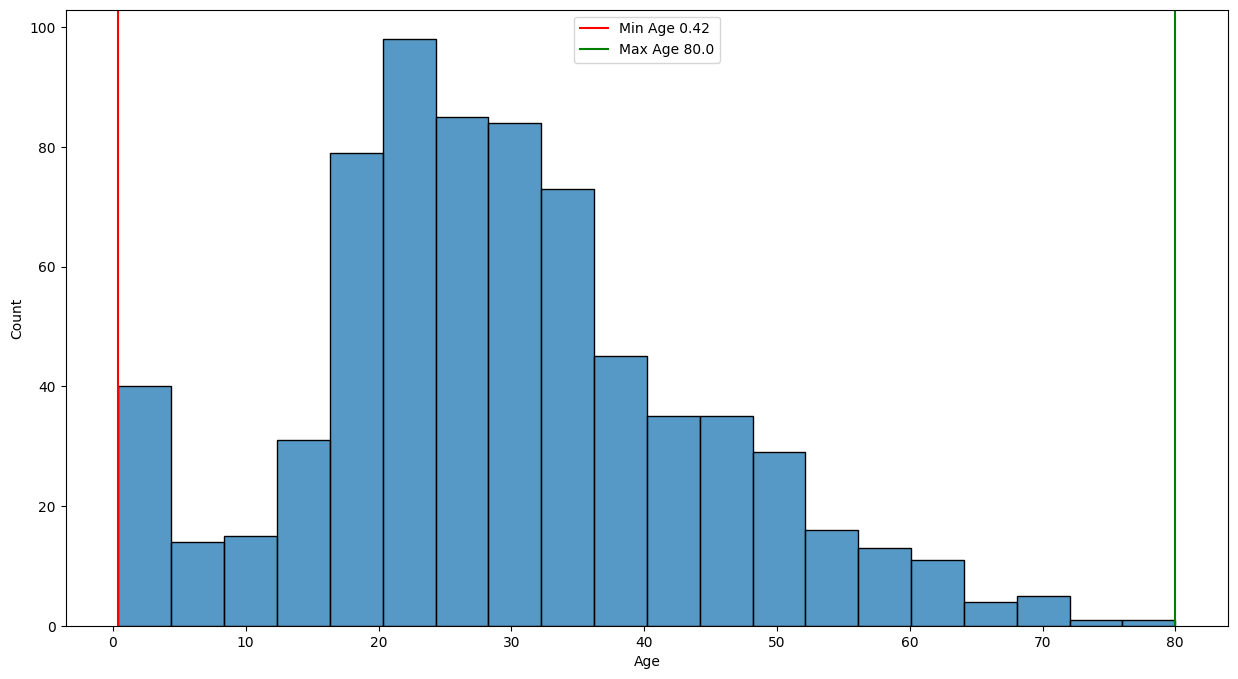

In [ ]:
# * What is the minimal and maximum ages of the passengers? Visualize it on the plot

plt.figure(figsize=(15, 8))
sns.histplot(data=data, x='Age')
plt.axvline(data.Age.min(), color='r', label=f"Min Age {data.Age.min()}")
plt.axvline(data.Age.max(), color='g', label=f"Max Age {data.Age.max()}")
plt.legend()

# Answer:
# Min - 0.42
# Max - 80

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [ ]:
# * How many are there unique titles?

data['Title'] = data.Name.str.extract(r'([A-Za-z]+)\.')
data.Title.unique().shape[0]

# Answer: 17

17

In [ ]:
# * How many are there passengers with every title?

data.Title.value_counts()

# Answer: See the table below

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
# * What is the most popular man's title? And woman's title?

print('Men: ', data[data.Sex == 'male'].Title.value_counts().idxmax())
print('Women: ', data[data.Sex == 'female'].Title.value_counts().idxmax())

# Answer:
# Men:  517
# Women:  182

Men:  Mr
Women:  Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



<Axes: xlabel='Embarked', ylabel='Fare'>

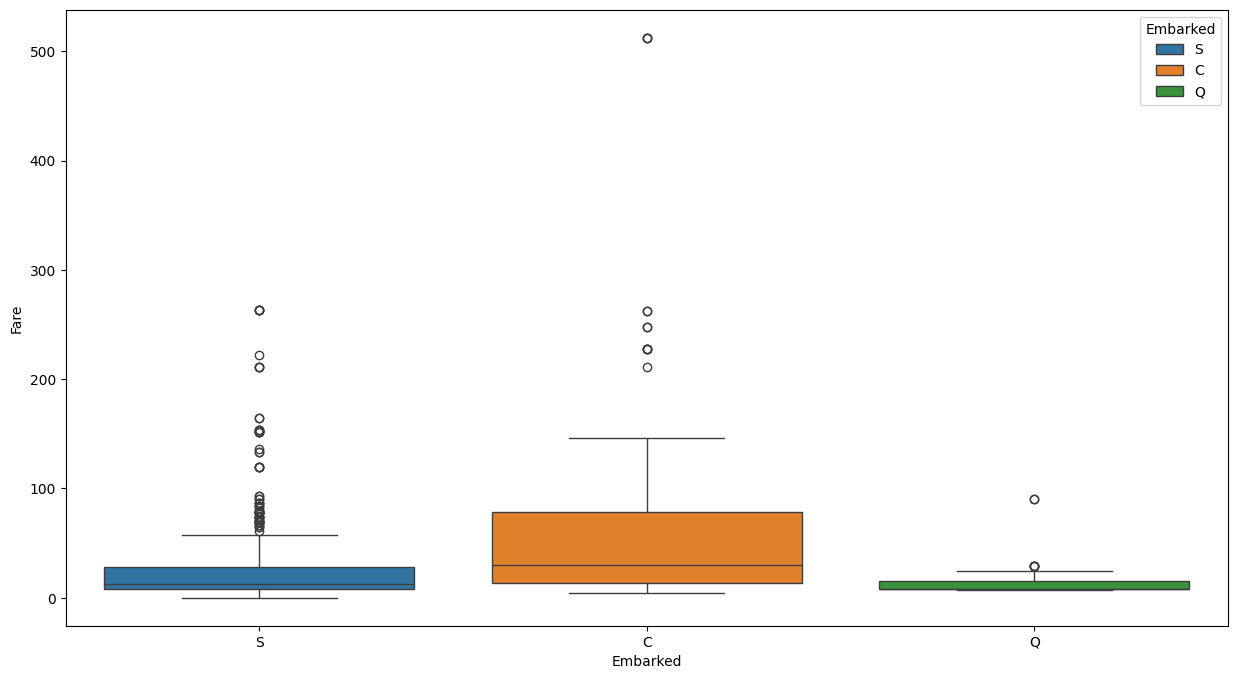

In [ ]:
# Let's use a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, y='Fare', x='Embarked', hue='Embarked')

In [ ]:
# Calculating a correlation between pclass and ticket price

data.Pclass.corr(data.Fare)

# The coefficient is -0.55 - they are a bit correlated inversively, but not too strongly

np.float64(-0.5494996199439074)

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [ ]:
# First, turn Categorical feature Embarked into a number
data['numericEmbarked'] = pd.factorize(data.Embarked)[0]

# Calculate the correlation
data.numericEmbarked.corr(data.Fare)

# Result: 0.058
# Almost no correlation

np.float64(0.05846240614212856)

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

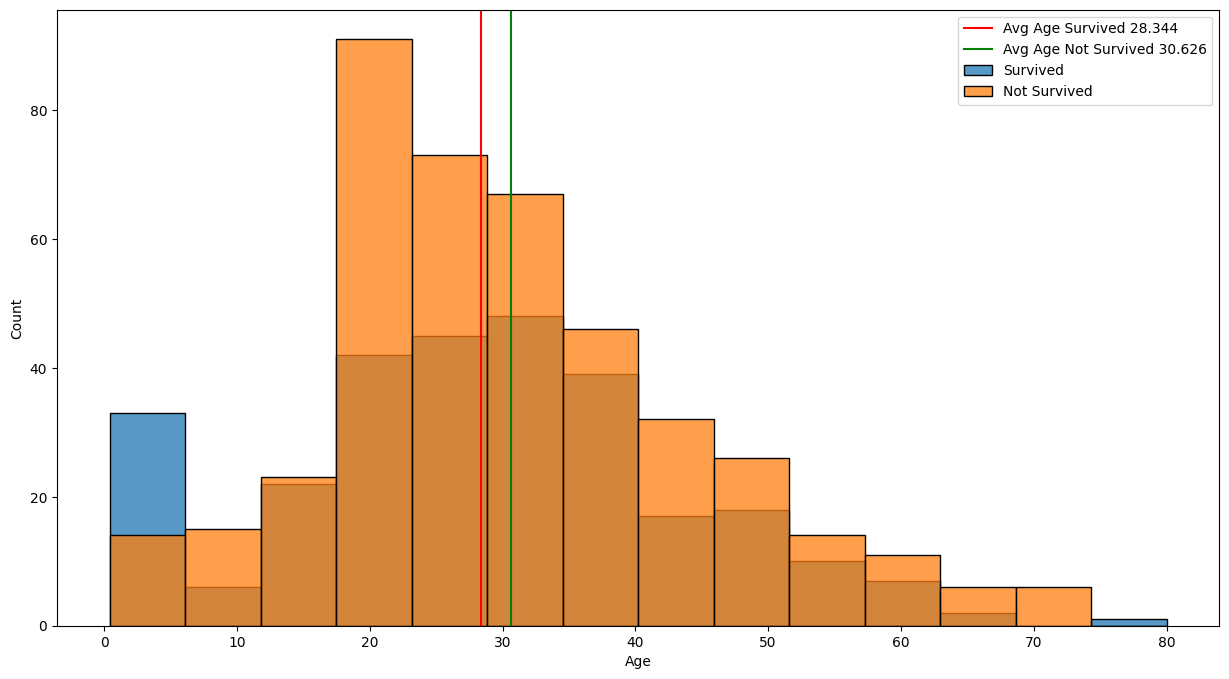

In [ ]:
# Distribution for survived and not survived

bins = np.linspace(data.Age.min(), data.Age.max(), 15)

plt.figure(figsize=(15, 8))
sns.histplot(data=data[data.Survived == 1], x='Age', bins=bins, label='Survived')
sns.histplot(data=data[data.Survived == 0], x='Age', bins=bins, label='Not Survived')

plt.axvline(data[data.Survived == 1].Age.mean(), color='r', label=f"Avg Age Survived {data[data.Survived == 1].Age.mean():.3f}")
plt.axvline(data[data.Survived == 0].Age.mean(), color='g', label=f"Avg Age Not Survived {data[data.Survived == 0].Age.mean():.3f}")
plt.legend()


In [ ]:
# As we can see on the plots, people in their 20-s, 30-s and 40-s were more likely not to survive than to survive

# Children under 5 years old were very likely to survive

# The older people, one the other hand, were more likely not to survive

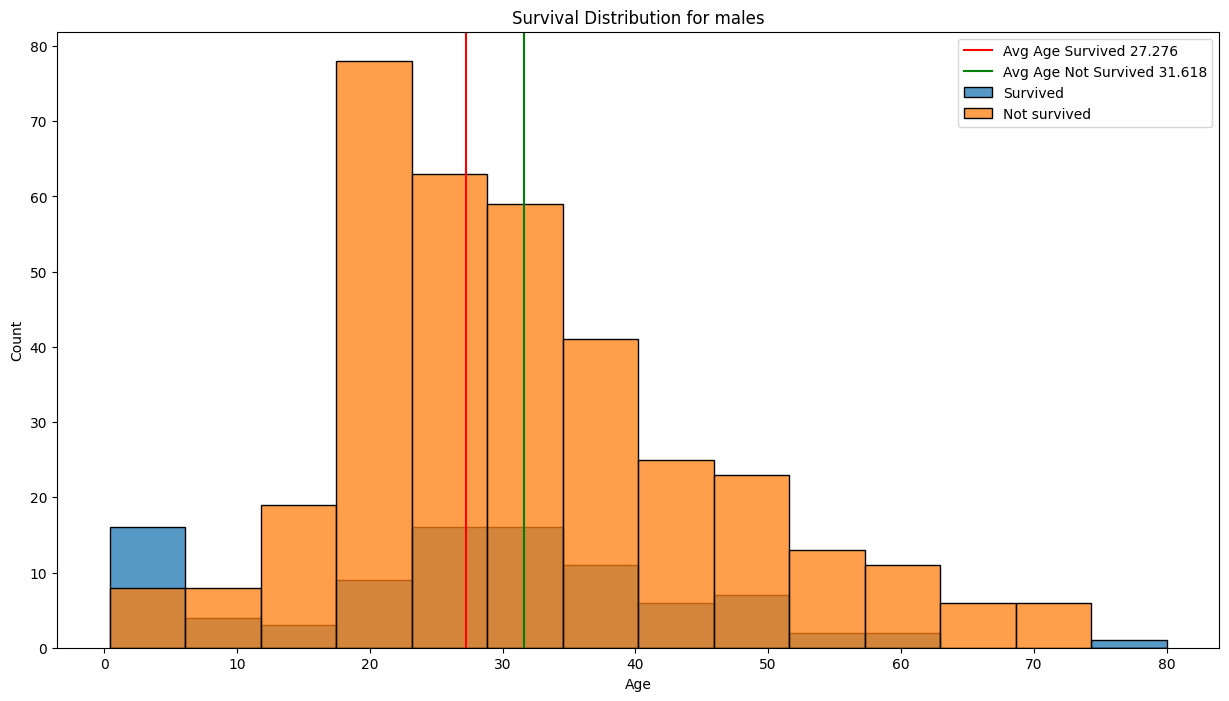

In [ ]:
# Distribution for males

bins = np.linspace(data.Age.min(), data.Age.max(), 15)

plt.figure(figsize=(15, 8))
sns.histplot(data=data[(data.Sex == 'male') & (data.Survived == 1)], x='Age', bins=bins, label='Survived')
sns.histplot(data=data[(data.Sex == 'male') & (data.Survived == 0)], x='Age', bins=bins, label='Not survived')

plt.axvline(data[(data.Sex == 'male') & (data.Survived == 1)].Age.mean(), color='r', label=f"Avg Age Survived {data[(data.Sex == 'male') & (data.Survived == 1)].Age.mean():.3f}")
plt.axvline(data[(data.Sex == 'male') & (data.Survived == 0)].Age.mean(), color='g', label=f"Avg Age Not Survived {data[(data.Sex == 'male') & (data.Survived == 0)].Age.mean():.3f}")
plt.title('Survival Distribution for males')
plt.legend()


In [ ]:
# Overall, men were more likely not to survive, especially those older than 5

# Only men under 5 and about 75 years old survived more

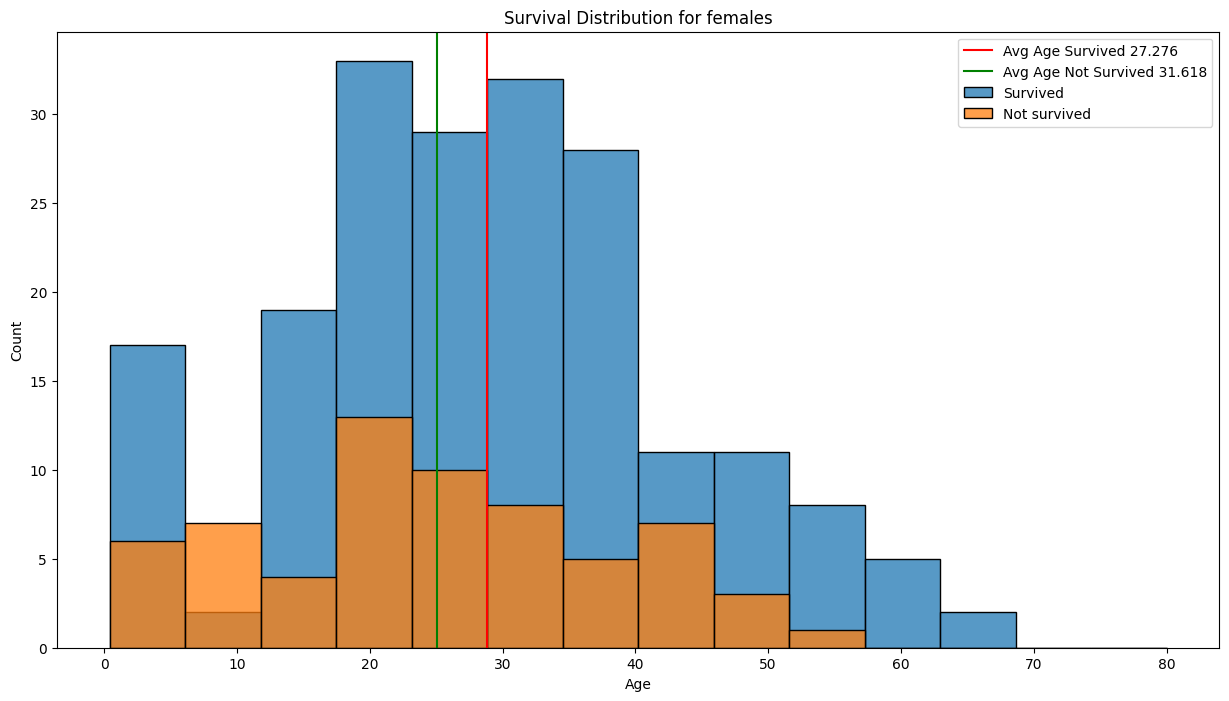

In [ ]:
# Distribution for females

bins = np.linspace(data.Age.min(), data.Age.max(), 15)

plt.figure(figsize=(15, 8))
sns.histplot(data=data[(data.Sex == 'female') & (data.Survived == 1)], x='Age', bins=bins, label='Survived')
sns.histplot(data=data[(data.Sex == 'female') & (data.Survived == 0)], x='Age', bins=bins, label='Not survived')

plt.axvline(data[(data.Sex == 'female') & (data.Survived == 1)].Age.mean(), color='r', label=f"Avg Age Survived {data[(data.Sex == 'male') & (data.Survived == 1)].Age.mean():.3f}")
plt.axvline(data[(data.Sex == 'female') & (data.Survived == 0)].Age.mean(), color='g', label=f"Avg Age Not Survived {data[(data.Sex == 'male') & (data.Survived == 0)].Age.mean():.3f}")
plt.title('Survival Distribution for females')
plt.legend()


In [ ]:
# It's completely different to men
# Overall, women were more likely to survive

# Except for young women about 10 years old